# Gradient Boosting Decision Tree Algorithm Explained

ref: https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4

## Code from scratch

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


pd.set_option('display.width', 500)

In [2]:
# 准备数据：根据房子年限、大小、位置，预测房价
dataset = pd.DataFrame(np.array([
    [5, 1500, 5, 480],
    [11, 2030, 12, 1090],
    [14, 1442, 6, 350],
    [8, 2501, 4, 1310],
    [12, 1300, 9, 400],
    [10, 1789, 11, 500]]),
    columns=['age', 'square-footage', 'location', 'price']);
dataset


,age,square-footage,location,price
0,5,1500,5,480
1,11,2030,12,1090
2,14,1442,6,350
3,8,2501,4,1310
4,12,1300,9,400
5,10,1789,11,500


In [3]:
# 计算target的平均值。对于回归问题，第一轮先计算所有target的平均值，然后用 target-average 计算第一轮的残差
average_price = np.average(dataset['price'])
average_price = round(average_price)

# 计算首轮残差
dataset['residual_r1'] = dataset['price'] - average_price
dataset

,age,square-footage,location,price,residual_r1
0,5,1500,5,480,-208
1,11,2030,12,1090,402
2,14,1442,6,350,-338
3,8,2501,4,1310,622
4,12,1300,9,400,-288
5,10,1789,11,500,-188


In [4]:
X_train = dataset[['age', 'square-footage', 'location']]
# 注意target不是原始的target，而是残差
y_train = dataset[['residual_r1']]
X_train, y_train

(   age  square-footage  location
 0    5            1500         5
 1   11            2030        12
 2   14            1442         6
 3    8            2501         4
 4   12            1300         9
 5   10            1789        11,
    residual_r1
 0         -208
 1          402
 2         -338
 3          622
 4         -288
 5         -188)

[Text(167.4, 181.2, 'X[1] <= 1909.5\nmse = 137380.556\nsamples = 6\nvalue = 0.333'),
 Text(83.7, 108.72, 'X[0] <= 11.0\nmse = 3668.75\nsamples = 4\nvalue = -255.5'),
 Text(41.85, 36.23999999999998, 'mse = 100.0\nsamples = 2\nvalue = -198.0'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 625.0\nsamples = 2\nvalue = -313.0'),
 Text(251.10000000000002, 108.72, 'X[1] <= 2265.5\nmse = 12100.0\nsamples = 2\nvalue = 512.0'),
 Text(209.25, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 402.0'),
 Text(292.95, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 622.0')]

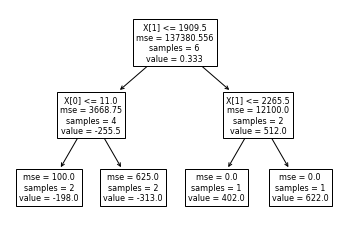

In [5]:
# 训练第一个弱分类器
clf_gini = DecisionTreeRegressor(max_depth=2, random_state=100)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [6]:
# 用训练出来的模型预测，得到预测值，然后计算本轮的残差，用于下一轮的训练
learning_rate = 0.5
pred_residual1 = clf_gini.predict(X_train)
print('pred_residual1:', pred_residual1)
pred1 = average_price + learning_rate * pred_residual1
print('pred1:', pred1)


pred_residual1: [-198.  402. -313.  622. -313. -198.]
pred1: [589.  889.  531.5 999.  531.5 589. ]


In [7]:
dataset['pred1'] = np.rint(pred1.reshape(-1, 1))    # 行向量转列向量
# 计算本轮的残差，用于下一轮的训练
dataset['residual_r2'] = dataset['price'] - dataset['pred1']
dataset

,age,square-footage,location,price,residual_r1,pred1,residual_r2
0,5,1500,5,480,-208,589.0,-109.0
1,11,2030,12,1090,402,889.0,201.0
2,14,1442,6,350,-338,532.0,-182.0
3,8,2501,4,1310,622,999.0,311.0
4,12,1300,9,400,-288,532.0,-132.0
5,10,1789,11,500,-188,589.0,-89.0


[Text(167.4, 181.2, 'X[1] <= 1909.5\nmse = 34578.667\nsamples = 6\nvalue = 0.0'),
 Text(83.7, 108.72, 'X[0] <= 13.0\nmse = 1203.5\nsamples = 4\nvalue = -128.0'),
 Text(41.85, 36.23999999999998, 'mse = 308.667\nsamples = 3\nvalue = -110.0'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = -182.0'),
 Text(251.10000000000002, 108.72, 'X[1] <= 2265.5\nmse = 3025.0\nsamples = 2\nvalue = 256.0'),
 Text(209.25, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 201.0'),
 Text(292.95, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 311.0')]

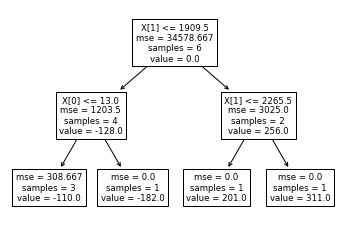

In [8]:
# round 2
y_train = dataset[['residual_r2']]
clf_gini = DecisionTreeRegressor(max_depth=2, random_state=100)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)


In [9]:
pred_residual2 = clf_gini.predict(X_train)
print('pred_residual2:', pred_residual2)
pred2 = average_price + learning_rate * pred_residual1 + learning_rate * pred_residual2
print('pred2:', pred2)

dataset['pred2'] = np.rint(pred2.reshape(-1, 1))    # 行向量转列向量
dataset['residual_r3'] = dataset['price'] - dataset['pred2']
dataset

pred_residual2: [-110.  201. -182.  311. -110. -110.]
pred2: [ 534.   989.5  440.5 1154.5  476.5  534. ]


,age,square-footage,location,price,residual_r1,pred1,residual_r2,pred2,residual_r3
0,5,1500,5,480,-208,589.0,-109.0,534.0,-54.0
1,11,2030,12,1090,402,889.0,201.0,990.0,100.0
2,14,1442,6,350,-338,532.0,-182.0,440.0,-90.0
3,8,2501,4,1310,622,999.0,311.0,1154.0,156.0
4,12,1300,9,400,-288,532.0,-132.0,476.0,-76.0
5,10,1789,11,500,-188,589.0,-89.0,534.0,-34.0


[Text(167.4, 181.2, 'X[1] <= 1909.5\nmse = 8713.889\nsamples = 6\nvalue = 0.333'),
 Text(83.7, 108.72, 'X[0] <= 11.0\nmse = 454.75\nsamples = 4\nvalue = -63.5'),
 Text(41.85, 36.23999999999998, 'mse = 100.0\nsamples = 2\nvalue = -44.0'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 49.0\nsamples = 2\nvalue = -83.0'),
 Text(251.10000000000002, 108.72, 'X[1] <= 2265.5\nmse = 784.0\nsamples = 2\nvalue = 128.0'),
 Text(209.25, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 100.0'),
 Text(292.95, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 156.0')]

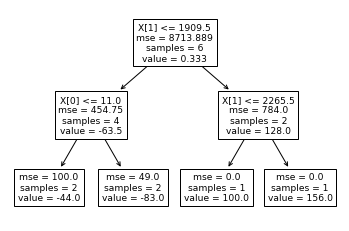

In [10]:
# round 3
y_train = dataset[['residual_r3']]
clf_gini = DecisionTreeRegressor(max_depth=2, random_state=100)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

In [11]:
pred_residual3 = clf_gini.predict(X_train)
print('pred_residual3:', pred_residual3)
pred3 = average_price + learning_rate * pred_residual1 + learning_rate * pred_residual2 + learning_rate * pred_residual3
print('pred3:', pred3)

dataset['pred3'] = np.rint(pred3.reshape(-1, 1))    # 行向量转列向量
dataset['residual_r4'] = dataset['price'] - dataset['pred3']
dataset

pred_residual3: [-44. 100. -83. 156. -83. -44.]
pred3: [ 512.  1039.5  399.  1232.5  435.   512. ]


,age,square-footage,location,price,residual_r1,pred1,residual_r2,pred2,residual_r3,pred3,residual_r4
0,5,1500,5,480,-208,589.0,-109.0,534.0,-54.0,512.0,-32.0
1,11,2030,12,1090,402,889.0,201.0,990.0,100.0,1040.0,50.0
2,14,1442,6,350,-338,532.0,-182.0,440.0,-90.0,399.0,-49.0
3,8,2501,4,1310,622,999.0,311.0,1154.0,156.0,1232.0,78.0
4,12,1300,9,400,-288,532.0,-132.0,476.0,-76.0,435.0,-35.0
5,10,1789,11,500,-188,589.0,-89.0,534.0,-34.0,512.0,-12.0


pred_residual4: [-38.66666667  50.         -38.66666667  78.         -38.66666667
 -12.        ]
pred4: [ 492.66666667 1064.5         379.66666667 1271.5         415.66666667
  506.        ]


,age,square-footage,location,price,residual_r1,pred1,residual_r2,pred2,residual_r3,pred3,residual_r4,pred4,residual_r5
0,5,1500,5,480,-208,589.0,-109.0,534.0,-54.0,512.0,-32.0,493.0,-13.0
1,11,2030,12,1090,402,889.0,201.0,990.0,100.0,1040.0,50.0,1064.0,26.0
2,14,1442,6,350,-338,532.0,-182.0,440.0,-90.0,399.0,-49.0,380.0,-30.0
3,8,2501,4,1310,622,999.0,311.0,1154.0,156.0,1232.0,78.0,1272.0,38.0
4,12,1300,9,400,-288,532.0,-132.0,476.0,-76.0,435.0,-35.0,416.0,-16.0
5,10,1789,11,500,-188,589.0,-89.0,534.0,-34.0,512.0,-12.0,506.0,-6.0


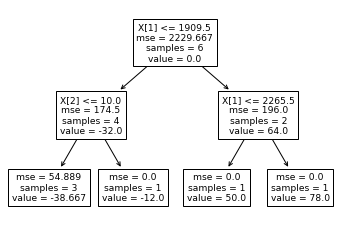

In [12]:
# round 4
y_train = dataset[['residual_r4']]
clf_gini = DecisionTreeRegressor(max_depth=2, random_state=100)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

pred_residual4 = clf_gini.predict(X_train)
print('pred_residual4:', pred_residual4)
pred4 = average_price + learning_rate * pred_residual1 + learning_rate * pred_residual2 + learning_rate * pred_residual3 + learning_rate * pred_residual4
print('pred4:', pred4)

dataset['pred4'] = np.rint(pred4.reshape(-1, 1))    # 行向量转列向量
dataset['residual_r5'] = dataset['price'] - dataset['pred4']
dataset

pred_residual5: [-11.66666667  26.         -30.          38.         -11.66666667
 -11.66666667]
pred5: [ 486.83333333 1077.5         364.66666667 1290.5         409.83333333
  500.16666667]


,age,square-footage,location,price,residual_r1,pred1,residual_r2,pred2,residual_r3,pred3,residual_r4,pred4,residual_r5,pred5
0,5,1500,5,480,-208,589.0,-109.0,534.0,-54.0,512.0,-32.0,493.0,-13.0,487.0
1,11,2030,12,1090,402,889.0,201.0,990.0,100.0,1040.0,50.0,1064.0,26.0,1078.0
2,14,1442,6,350,-338,532.0,-182.0,440.0,-90.0,399.0,-49.0,380.0,-30.0,365.0
3,8,2501,4,1310,622,999.0,311.0,1154.0,156.0,1232.0,78.0,1272.0,38.0,1290.0
4,12,1300,9,400,-288,532.0,-132.0,476.0,-76.0,435.0,-35.0,416.0,-16.0,410.0
5,10,1789,11,500,-188,589.0,-89.0,534.0,-34.0,512.0,-12.0,506.0,-6.0,500.0


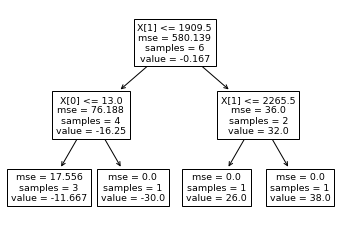

In [13]:
# round 5
y_train = dataset[['residual_r5']]
clf_gini = DecisionTreeRegressor(max_depth=2, random_state=100)
clf = clf_gini.fit(X_train, y_train)
tree.plot_tree(clf)

pred_residual5 = clf_gini.predict(X_train)
print('pred_residual5:', pred_residual5)
pred5 = average_price + learning_rate * pred_residual1 + learning_rate * pred_residual2 + learning_rate * pred_residual3 + learning_rate * pred_residual4 + learning_rate * pred_residual5
print('pred5:', pred5)

dataset['pred5'] = np.rint(pred5.reshape(-1, 1))    # 行向量转列向量
# dataset['residual_r6'] = dataset['price'] - dataset['pred5']
dataset

## GradientBoostingRegressor in Sklearn

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
gbr = GradientBoostingRegressor(learning_rate=0.5, n_estimators=5, random_state=100)
y_train = dataset[['price']]
gbr.fit(X_train, y_train)
gbr.predict(X_train)

/Volumes/Files/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ 486.51041667, 1077.44791667,  360.57291667, 1290.57291667,
        409.01041667,  505.88541667])

可以看到预测值和手动实现的GBDT的预测值非常接近。